---
title: SHAP values and Coefficients of Logistic Regression
author: "Nguyễn Ngọc Bình"
---

## Load Libraries and Data

In [19]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the German Credit Data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings',
                'employment', 'installment_rate', 'personal_status', 'other_debtors', 'residence_since',
                'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'people_liable',
                'telephone', 'foreign_worker', 'class']
data = pd.read_csv(data_url, delimiter=' ', names=column_names)

# Preprocess the data
X = data.drop('class', axis=1)
y = data['class']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train[y_train == 2] = 0
y_test[y_test == 2] = 0


## Train a Logistic Regression Model

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
# Create a pipeline with feature selection using SelectKBest and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),                       # Standardize features
    ('feature_selector', SelectKBest(score_func=f_classif, k=10)),  # Select top k features using f_classif
    ('classifier', LogisticRegression(max_iter=1000))   # Logistic regression classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selector', SelectKBest()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [50]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
auc = roc_auc_score(y_test, y_pred)
print(f"auc: {auc:.2f}")

auc: 0.60


## Create SHAP Explainer

In [46]:
# Create a callable model class that wraps the pipeline
class PipelineModel:
    def __init__(self, pipeline):
        self.pipeline = pipeline
    
    def __call__(self, x):
        return self.pipeline.predict_proba(x)[:, 1]

# Create a SHAP explainer for the callable model
callable_model = PipelineModel(pipeline)
explainer = shap.Explainer(callable_model, X_train)

# Choose an instance to explain
instance_to_explain = X_test.iloc[0]  # Choose the instance you want to explain

# Calculate SHAP values for the instance
shap_values = explainer.shap_values(instance_to_explain.values.reshape(1, -1))

# Print SHAP values for each feature
print("SHAP Values:")
print(shap_values)

SHAP Values:
[[ 0.02579396  0.00329706  0.          0.         -0.0606596   0.
   0.         -0.01900188  0.         -0.081538    0.00779974  0.
   0.         -0.0338136   0.          0.          0.          0.09000797
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.01083979  0.          0.          0.02214676
   0.          0.          0.          0.          0.          0.        ]]


In [73]:
.629+.09-.08-.03-.06+.03+.02-.02+.02

0.599

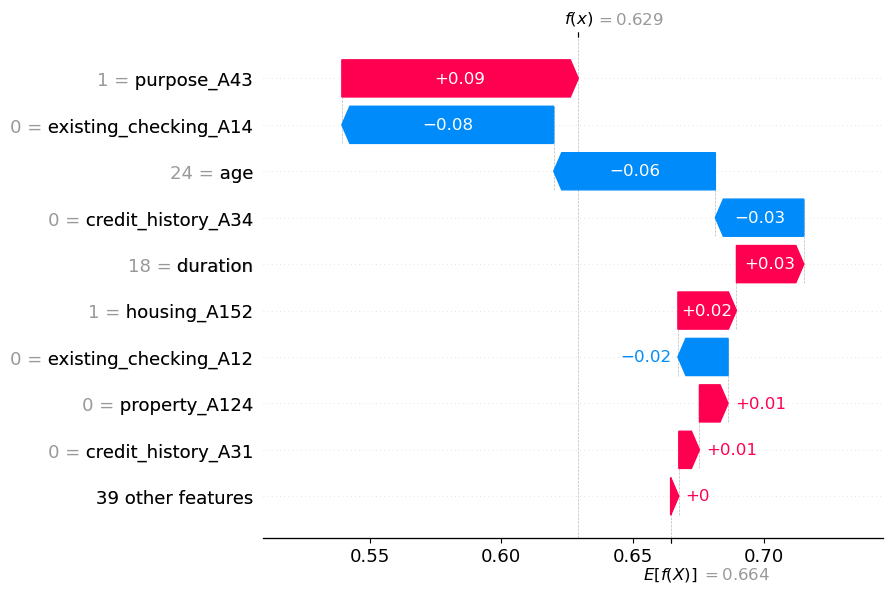

In [71]:
# Choose the specific feature for which you want to calculate change
obs_index = 0  # Replace with the index of the feature you're interested in
shap_object  = explainer(X_test)
shap.plots.waterfall(shap_object[obs_index])

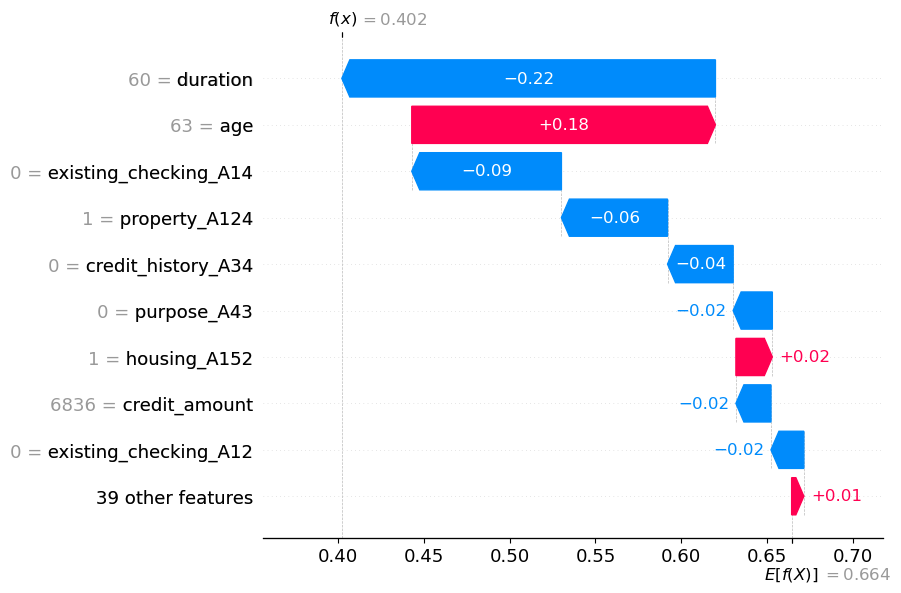

In [67]:
# Choose the specific feature for which you want to calculate change
obs_index = 0  # Replace with the index of the feature you're interested in
shap_object  = explainer(X_train)
shap.plots.waterfall(shap_object[obs_index])

In [70]:
X_train[0:]

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable,existing_checking_A12,existing_checking_A13,existing_checking_A14,...,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
29,60,6836,3,4,63,2,1,0,0,0,...,1,0,1,1,0,0,1,0,1,0
535,21,2319,2,1,33,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
695,6,1236,2,4,50,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
557,21,5003,1,4,29,2,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
836,12,886,4,2,21,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18,6458,2,4,39,2,2,0,0,1,...,1,0,0,1,0,0,0,1,1,0
270,18,2662,4,3,32,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1
860,24,5804,4,2,27,2,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
435,12,1484,2,1,25,1,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0


## So sánh giữa các giá trị SHAP và Hệ số đối với hồi quy logistic


| Khía cạnh | Giá trị SHAP | Hệ số (Hồi quy logistic) |
|--------------------------|------------------------------------------------------------|------------------------------------------------|
| Mục đích | Giải thích các dự đoán riêng lẻ, tác động của feature | Giải thích mối quan hệ tổng thể của feature-log-odds |
| Khả năng giải thích | Dễ hiểu trực tiếp hơn đối với các dự đoán riêng lẻ | Giải thích thường yêu cầu ngữ cảnh |
| Hiệu ứng tương tác | Ghi lại các tương tác phức tạp giữa các features | Giả sử tương tác tuyến tính (hạn chế) |
| Khả năng ứng dụng | Áp dụng cho nhiều mô hình khác nhau, kể cả những mô hình phức tạp | Cụ thể cho các mô hình tuyến tính như hồi quy logistic |
| Trực quan hóa | Có sẵn nhiều phương pháp trực quan hóa khác nhau để hiểu rõ hơn | Feature importance |
| So sánh | Có thể so sánh giữa các mô hình khác nhau | Cụ thể cho kiến trúc mô hình |
| Tính toán | Có thể tốn kém về mặt tính toán đối với các mô hình phức tạp | Tính toán hiệu quả cho hồi quy logistic |
| Tính linh hoạt | Hỗ trợ tính phi tuyến tính, hữu ích cho các mô hình phức tạp | Giả định mối quan hệ tuyến tính, kém linh hoạt |
| Chi tiết giải thích | Tác động feature chi tiết đến từng dự đoán | Tác động chung của feature lên log-odds |



## Cách giải thích hệ số mô hình logistic

Công thức của Logistic Regression có thể được biểu diễn dưới dạng log-odds như sau:

$$ \text{log-odds} = \ln \left( \frac{P(y=1 \,|\, \mathbf{x})}{1 - P(y=1 \,|\, \mathbf{x})} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p $$

Trong đó:
- $P(y=1 \,|\, \mathbf{x})$ là xác suất có điều kiện rằng kết quả $y$ bằng 1 dưới điều kiện các đặc trưng $\mathbf{x}$.
- $\beta_0$ là hệ số chặn.
- $\beta_1, \beta_2, \ldots, \beta_p$ là các hệ số cho các đặc trưng $x_1, x_2, \ldots, x_p$.
- $\ln$ đại diện cho hàm logarit tự nhiên.

Biểu thức $\frac{P(y=1 \,|\, \mathbf{x})}{1 - P(y=1 \,|\, \mathbf{x})}$ là tỷ lệ giữa xác suất nhóm 1 và xác suất nhóm 0, còn được gọi là tỷ lệ cơ hội (odds). Hàm logarit tự nhiên $\ln$ biến đổi tỷ lệ cơ hội thành giá trị log-odds.

Công thức log-odds thể hiện mối liên hệ tuyến tính giữa các đặc trưng và log-odds của xác suất dương. Trong quá trình huấn luyện mô hình, các hệ số $\beta_i$ được điều chỉnh để tối ưu hóa khả năng dự đoán chính xác dựa trên dữ liệu huấn luyện.

Các hệ số của mô hình hồi quy logistic biểu thị mối quan hệ giữa các biến độc lập (features) và tỷ lệ log-odds của biến phụ thuộc (kết quả nhị phân). Các hệ số này có thể được giải thích để hiểu những thay đổi trong features ảnh hưởng như thế nào đến xác suất của lớp dương (positive class).

Đây là cách bạn có thể giải thích các hệ số của mô hình hồi quy logistic:


1. **Hệ số dương:**
    - Hệ số dương (ví dụ: $\beta_1 > 0$) chỉ ra rằng việc tăng giá trị biến độc lập tương ứng dẫn đến tăng tỷ lệ log-odds của lớp dương.
    - Hay là khi giá trị biến độc lập tăng thêm một đơn vị thì xác suất xuất hiện lớp dương cũng tăng.

1. **Hệ số âm:**
    - Hệ số âm (ví dụ: $\beta_2 < 0$) chỉ ra rằng việc tăng giá trị feature tương ứng dẫn đến giảm tỷ lệ log-odds của lớp dương.
    - Hay là khi giá trị biến độc lập tăng lên một đơn vị thì xác suất xuất hiện lớp dương sẽ giảm.

1. **Độ lớn của các hệ số:**
    - Độ lớn của các hệ số biểu thị mức độ mạnh của mối quan hệ giữa feature và outcome.
    - Giá trị tuyệt đối lớn hơn cho thấy tác động mạnh hơn đến log-odds và do đó đến xác suất dự đoán.

1. **Giải thích về tỷ lệ Odds:**
    - Ví dụ: nếu $\beta_3 = 0.5$, tỷ lệ chênh lệch là $e^{0.5} \approx 1.648$. Điều này có nghĩa là khi tính năng này tăng thêm một đơn vị, tỷ lệ xảy ra kết quả tích cực sẽ tăng theo hệ số xấp xỉ 1,648.


Dưới đây là ví dụ về cách bạn có thể giải thích hệ số dương: "Khi tăng một đơn vị trong biến 'Tuổi', tỷ lệ log của một khách hàng không trả được nợ sẽ tăng thêm 0,25. Điều này có nghĩa là khi độ tuổi của khách hàng tăng lên một năm, khả năng vỡ nợ cũng tăng lên.”

Và một ví dụ về hệ số âm: "Đối với mỗi đơn vị tăng trong biến 'Thu nhập', tỷ lệ log của một khách hàng không trả được nợ sẽ giảm 0,15. Điều này cho thấy rằng mức thu nhập cao hơn có liên quan đến khả năng giảm vỡ nợ.”

**Công thức SHAP Value:**

Công thức chính của SHAP (SHapley Additive exPlanations) value cho một đặc trưng $i$ đối với một dự đoán cụ thể là:

$$ SHAP_i = \phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} \left[ f(x_S \cup \{i\}) - f(x_S) \right] $$

Trong đó:
- $N$ là tập hợp tất cả các đặc trưng.
- $S$ là một tập con của $N$ không chứa đặc trưng $i$.
- $f(x_S)$ là dự đoán của mô hình cho mẫu dữ liệu $x$ khi chỉ giữ lại các đặc trưng trong tập $S$.
- $f(x_S \cup \{i\})$ là dự đoán của mô hình cho mẫu dữ liệu $x$ khi thêm đặc trưng $i$ vào tập $S$.

**Giải thích SHAP Value:**

SHAP value giải thích sự đóng góp của từng đặc trưng vào giá trị dự đoán của mô hình cho một mẫu dữ liệu cụ thể. Đối với mỗi đặc trưng, SHAP value là sự khác biệt giữa giá trị dự đoán khi thêm đặc trưng đó và khi không thêm đặc trưng, được trung bình trên tất cả các tập con của các đặc trưng khác.

- Nếu $SHAP_i > 0$, đặc trưng $i$ có xu hướng tăng giá trị dự đoán so với kỳ vọng cơ bản (trung bình trên tất cả các tập con).
- Nếu $SHAP_i < 0$, đặc trưng $i$ có xu hướng giảm giá trị dự đoán so với kỳ vọng cơ bản.
- Nếu $SHAP_i = 0$, đặc trưng $i$ không có sự đóng góp vào sự khác biệt giữa dự đoán thực tế và kỳ vọng cơ bản.

SHAP value cho mỗi đặc trưng cung cấp cái nhìn về việc tại sao dự đoán cuối cùng lại có giá trị cụ thể. Bằng cách tổng hợp các SHAP value lại, bạn có thể hiểu được cách các đặc trưng ảnh hưởng đến dự đoán và làm thế nào chúng kết hợp lại để tạo ra giá trị dự đoán cho mẫu dữ liệu đó.